# Jet内のトラックの種類や分布を可視化してみる

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
from tqdm import tqdm
import atlasify
from modules import file_util

2024-01-16 14:18:40.143406: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
truth_path = "/home/suzukiy/ftag/umami-dataset/umami-018-2-GNx/prepared/inclusive_testing_ttbar_PFlow.h5"
file_util.display_h5_file(truth_path)

Displaying contents of file: /home/suzukiy/ftag/umami-dataset/umami-018-2-GNx/prepared/inclusive_testing_ttbar_PFlow.h5
/jets: [Dataset](4042856,)
/tracks_default: [Dataset](4042856, 40)
/tracks_loose: [Dataset](4042856, 40)


In [9]:
limit = 10000
with h5py.File(truth_path, "r") as h5f:
    h5f_jet_truth = h5f["jets"][:limit][()]
    h5f_track_truth = h5f["tracks_loose"][:limit][()]

In [34]:
track_variables = [
    "pt",
    "deta",
    "dphi",
    "truthOriginLabel",
    "truthVertexIndex",
]

jet_variables = [
    "pt",
    "HadronConeExclExtendedTruthLabelID",
]

df_jet = pd.DataFrame(h5f_jet_truth, columns=jet_variables)
is_b = df_jet["HadronConeExclExtendedTruthLabelID"] == 5
is_c = df_jet["HadronConeExclExtendedTruthLabelID"] == 4
is_light = df_jet["HadronConeExclExtendedTruthLabelID"] == 0
is_flavour = is_b | is_c | is_light

dict_track_variables = {}
for track_variable in track_variables:
    dict_track_variables[track_variable] = h5f_track_truth[track_variable][is_flavour]

df_jet = df_jet[is_flavour].reset_index(drop=True)

In [35]:
df_jet

pt  HadronConeExclExtendedTruthLabelID
0     173324.765625                                   5
1     102561.968750                                   5
2      68873.492188                                   4
3      25425.339844                                   0
4      94982.421875                                   5
...             ...                                 ...
9498   21052.560547                                   5
9499  145194.421875                                   0
9500   82789.890625                                   0
9501   57234.375000                                   0
9502   52099.675781                                   5

[9503 rows x 2 columns]

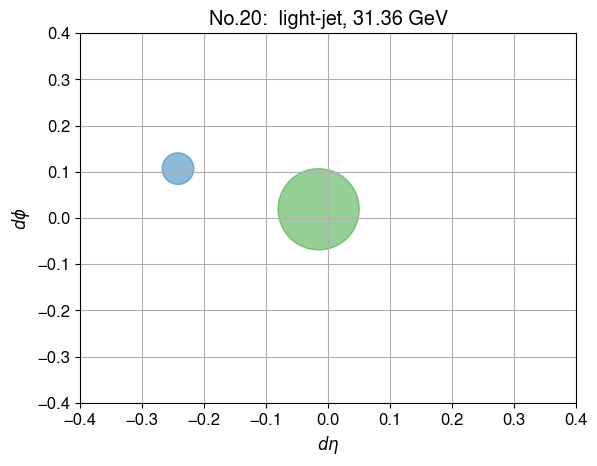

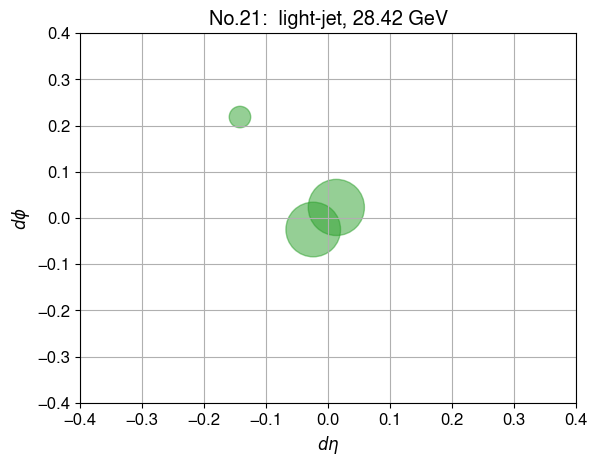

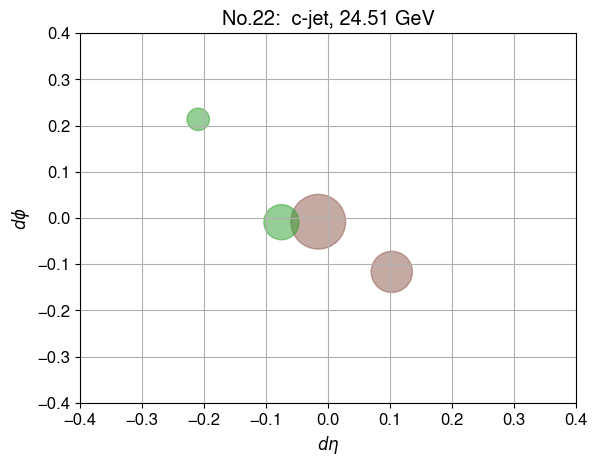

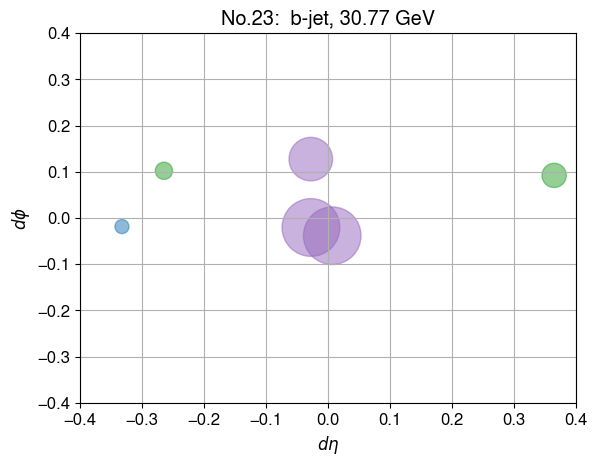

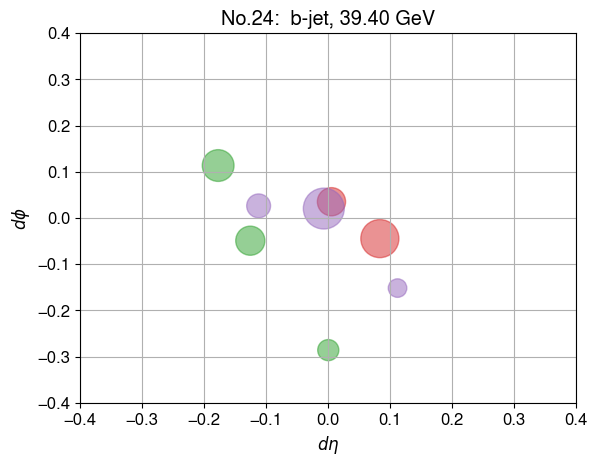

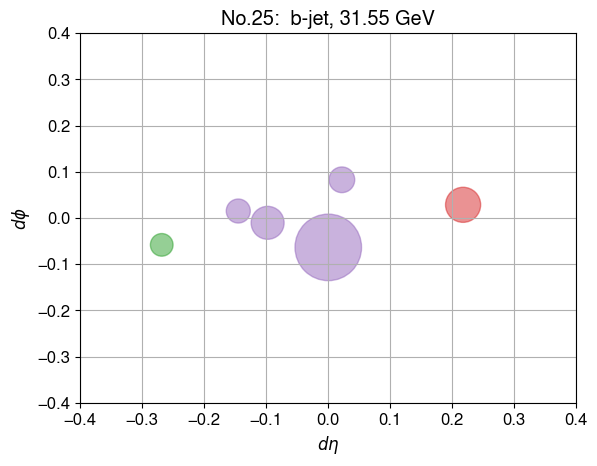

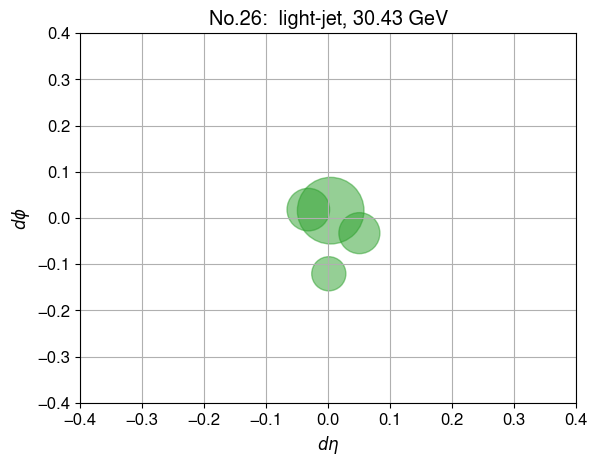

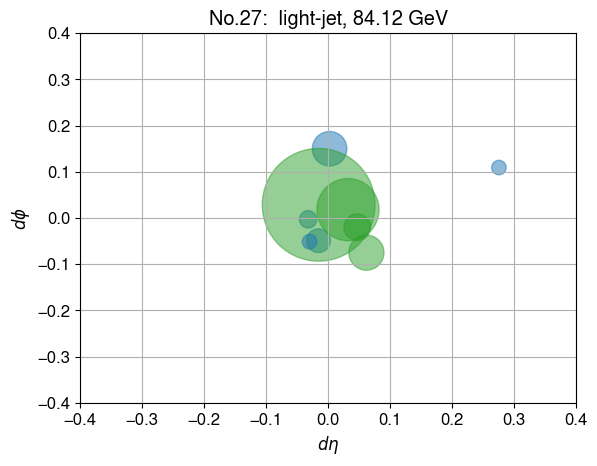

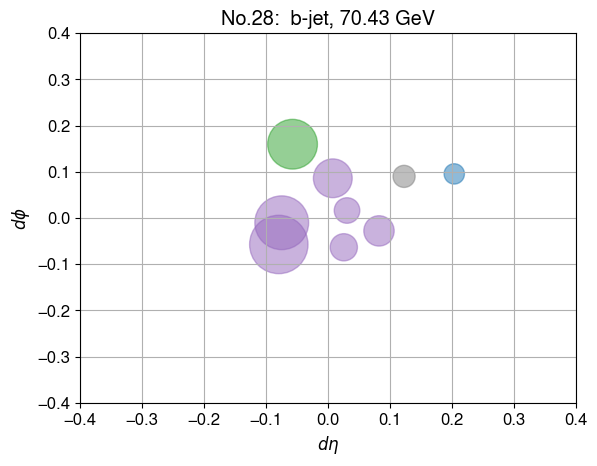

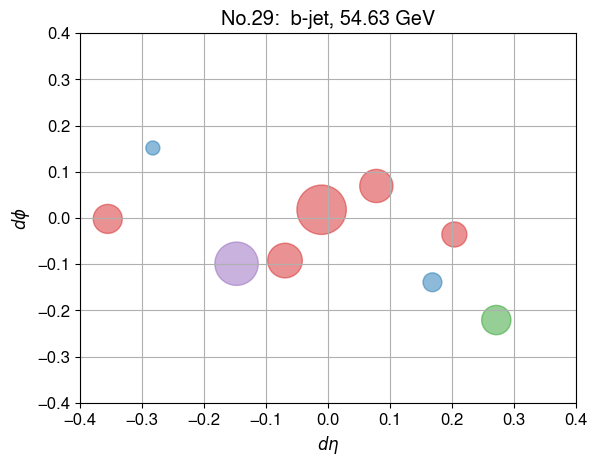

In [65]:
%matplotlib inline
plt.rcParams['font.size'] = 12
for i in range(20, 30):
    if df_jet["HadronConeExclExtendedTruthLabelID"][i] == 5:
        label = "b"
    elif df_jet["HadronConeExclExtendedTruthLabelID"][i] == 4:
        label = "c"
    else:
        label = "light"
    _jet_pt = df_jet["pt"][i] / 1000
    n_track = 40 - np.isnan(dict_track_variables["pt"][i]).sum()
    color = [f"C{dict_track_variables['truthOriginLabel'][i][j]}" for j in range(n_track)]
    plt.scatter(
        dict_track_variables["deta"][i][:n_track],
        dict_track_variables["dphi"][i][:n_track],
        s=dict_track_variables["pt"][i][:n_track]/5,
        alpha=0.5,
        color=color,
    )
    plt.xlabel("$d \eta$")
    plt.ylabel("$d \phi$")
    plt.xlim(-0.4, 0.4)
    plt.ylim(-0.4, 0.4)
    plt.title(f"No.{i}:  {label}-jet, {_jet_pt:.2f} GeV")
    plt.grid()
    plt.savefig(f"figures/track_dist/track_{i}.pdf", bbox_inches="tight")
    plt.show()

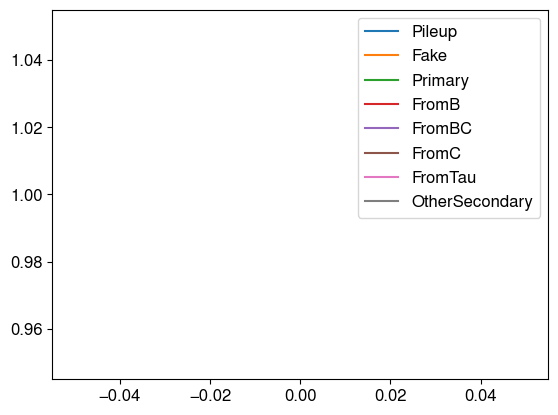

In [60]:
track_origin_label_names = [
    "Pileup",
    "Fake",
    "Primary",
    "FromB",
    "FromBC",
    "FromC",
    "FromTau",
    "OtherSecondary"
]

for i in range(8):
    plt.plot([1], label=track_origin_label_names[i], color=f"C{i}")
plt.legend()
plt.savefig("figures/track_dist/legend.pdf", bbox_inches="tight")
plt.show()